<a href="https://colab.research.google.com/github/Eddav29/MachineLearning_Ganjil_2024/blob/main/Jobsheet_9_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
ANN diimplementasikan dengan menggunakan tensorflow.

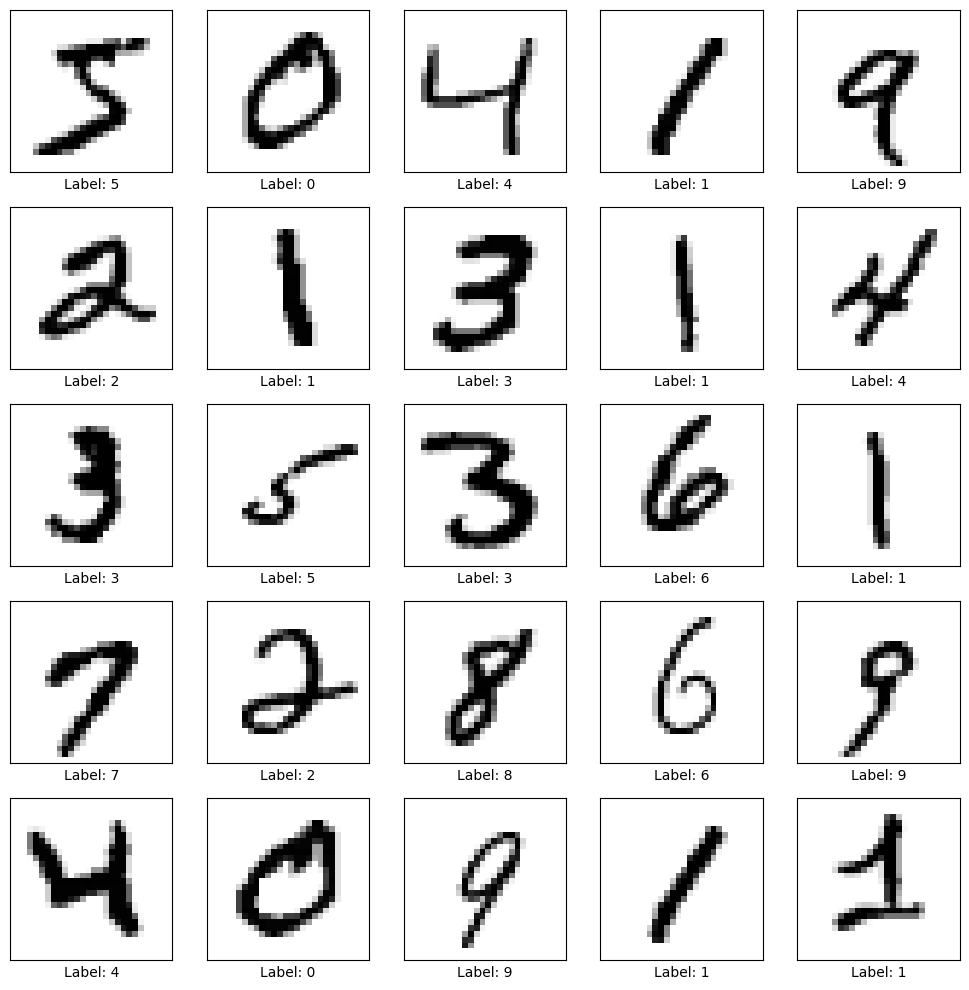

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)


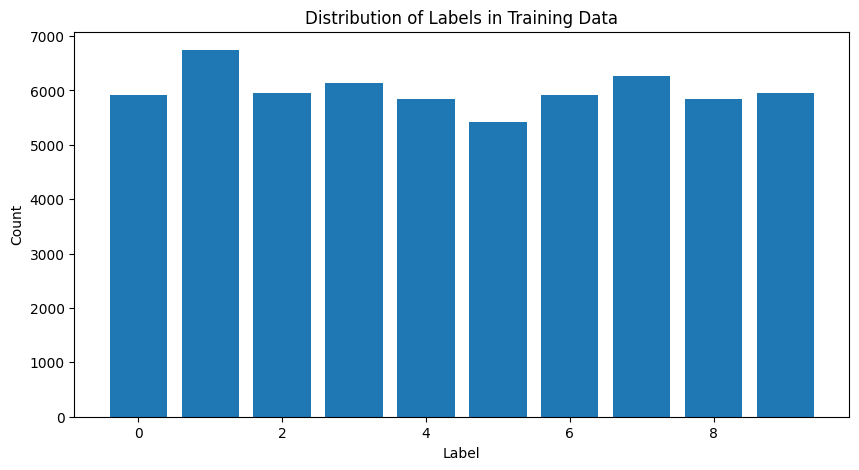

Min pixel value: 0
Max pixel value: 255
Mean pixel value: 33.32
Standard deviation of pixel values: 78.57


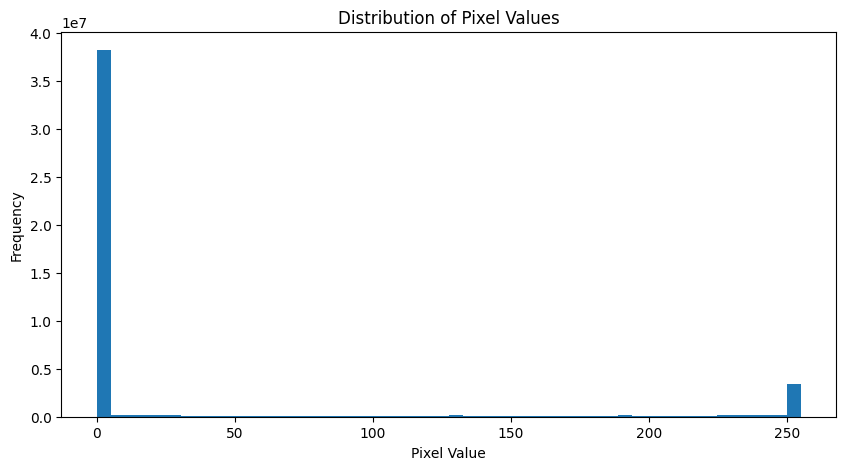

In [4]:
#@title Import library yang diperlukan dan load data MNIST:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#@title Pra-pengolahan data:

# Visualisasi beberapa sampel gambar
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')
plt.tight_layout()
plt.show()

# Melihat bentuk data
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test data: {X_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

# Melihat distribusi label
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique, counts)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Melihat statistik pixel
print(f"Min pixel value: {X_train.min()}")
print(f"Max pixel value: {X_train.max()}")
print(f"Mean pixel value: {X_train.mean():.2f}")
print(f"Standard deviation of pixel values: {X_train.std():.2f}")

# Visualisasi distribusi pixel
plt.figure(figsize=(10, 5))
plt.hist(X_train.ravel(), bins=50)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

TensorFlow dan Keras: Digunakan untuk membangun dan melatih model jaringan saraf (neural networks).
MNIST Dataset: Dataset ini berisi gambar hitam-putih digit angka (0-9) yang berukuran 28x28 piksel. Dataset ini sering digunakan untuk eksperimen dalam bidang machine learning.
X_train, y_train: Data gambar dan label untuk pelatihan.
X_test, y_test: Data gambar dan label untuk pengujian.




kemudian saat visualisasi

Sampel Gambar:

Menampilkan 25 sampel gambar dari dataset training beserta labelnya.
Ini membantu kita memahami secara visual bagaimana gambar-gambar angka tulisan tangan terlihat.


Bentuk Data:

Mencetak bentuk (shape) dari data training dan testing.
Ini membantu kita memahami dimensi data dan jumlah sampel yang tersedia.


Distribusi Label:

Menampilkan histogram distribusi label dalam data training.
Ini membantu kita melihat apakah dataset seimbang atau ada kelas yang overrepresented/underrepresented.


Statistik Pixel:

Mencetak nilai minimum, maksimum, rata-rata, dan standar deviasi dari nilai pixel.
Ini membantu kita memahami rentang dan distribusi nilai pixel dalam dataset.


Distribusi Nilai Pixel:

Menampilkan histogram distribusi nilai pixel dari seluruh dataset training.
Ini membantu kita memahami bagaimana nilai pixel terdistribusi dan apakah ada pola tertentu.

In [5]:
#@title Pra pengolahan data
# Pra-pengolahan data

# 1. Normalisasi data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. Reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# 3. One-hot encoding untuk label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 4. Membagi data training menjadi training dan validasi
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Memeriksa bentuk data setelah pra-pengolahan
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of validation data: {X_val.shape}")
print(f"Shape of test data: {X_test.shape}")

# Memeriksa nilai pixel setelah normalisasi
print(f"Min pixel value in training data: {X_train.min()}")
print(f"Max pixel value in training data: {X_train.max()}")
print(f"Mean pixel value in training data: {X_train.mean():.4f}")

Shape of training data: (54000, 784)
Shape of validation data: (6000, 784)
Shape of test data: (10000, 784)
Min pixel value in training data: 0.0
Max pixel value in training data: 1.0
Mean pixel value in training data: 0.1307


Normalisasi Data:

Mengubah tipe data ke float32 untuk presisi yang lebih baik.
Membagi nilai pixel dengan 255 untuk mendapatkan nilai antara 0 dan 1.
Ini membantu model konvergen lebih cepat dan menghindari masalah dengan gradien yang terlalu besar.


Reshape Data:

Mengubah bentuk data dari (jumlah_sampel, 28, 28) menjadi (jumlah_sampel, 784).
Ini diperlukan karena kita akan menggunakan fully connected layers yang membutuhkan input 1D.


One-hot Encoding untuk Label:

Mengubah label dari bentuk integer (0-9) menjadi vektor one-hot.
Ini diperlukan untuk klasifikasi multi-kelas dengan menggunakan categorical crossentropy loss.


Membagi Data Training:

Memisahkan 10% data training untuk validasi.
Ini memungkinkan kita untuk memantau performa model pada data yang tidak digunakan dalam pelatihan, membantu mendeteksi overfitting.

In [6]:
def create_ann_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
input_shape = X_train.shape[1]
num_classes = 10
model = create_ann_model(input_shape, num_classes)

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Fungsi create_ann_model:

Fungsi ini menerima dua parameter: input_shape dan num_classes.
Ini membuat model Sequential dengan beberapa layer:

Dense layer pertama dengan 128 neuron dan aktivasi ReLU
Dropout layer dengan rate 0.2
Dense layer kedua dengan 64 neuron dan aktivasi ReLU
Dropout layer lain dengan rate 0.2
Dense layer output dengan jumlah neuron sesuai num_classes dan aktivasi softmax

Kompilasi model:

Optimizer: Adam
Loss function: categorical crossentropy
Metric: accuracy

Pembuatan model:

input_shape diambil dari dimensi data training (X_train.shape[1])
num_classes diset ke 10 (untuk digit 0-9)
Model dibuat dengan memanggil create_ann_model

Ringkasan model:

model.summary() dipanggil untuk menampilkan struktur model

**Kemudian hasil**
Ini menampilkan ringkasan model yang dibuat:

Layer 1 (dense):

Output shape: (None, 128)
Parameter: 100,480 (784 * 128 + 128 bias)


Layer 2 (dropout):

Output shape: (None, 128)
Parameter: 0 (dropout tidak memiliki parameter yang dapat dilatih)


Layer 3 (dense_1):

Output shape: (None, 64)
Parameter: 8,256 (128 * 64 + 64 bias)


Layer 4 (dropout_1):

Output shape: (None, 64)
Parameter: 0


Layer 5 (dense_2, output layer):

Output shape: (None, 10)
Parameter: 650 (64 * 10 + 10 bias)



Total parameter: 109,386

Trainable params: 109,386
Non-trainable params: 0

# Disingkat


Model ini adalah sebuah Artificial Neural Network (ANN) dengan 3 dense layer dan 2 dropout layer.
Input shape-nya adalah 784 (28x28 piksel dari gambar MNIST yang di-flatten).
Output layer memiliki 10 neuron, sesuai dengan 10 kelas digit (0-9).
Dropout digunakan untuk mencegah overfitting.
Total parameter yang dapat dilatih adalah 109,386, yang cukup besar untuk problem klasifikasi MNIST namun masih dalam batas wajar.



In [7]:
#@title Training Model
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7554 - loss: 0.7994 - val_accuracy: 0.9450 - val_loss: 0.1846
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9370 - loss: 0.2216 - val_accuracy: 0.9623 - val_loss: 0.1266
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9524 - loss: 0.1619 - val_accuracy: 0.9670 - val_loss: 0.1034
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9610 - loss: 0.1299 - val_accuracy: 0.9733 - val_loss: 0.0930
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9669 - loss: 0.1121 - val_accuracy: 0.9747 - val_loss: 0.0880
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9714 - loss: 0.0940 - val_accuracy: 0.9765 - val_loss: 0.0831
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9753 - loss: 0.0805 - val_accuracy: 0.9752 - val_loss: 0.0799
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9750 - loss: 0.0787 - val_accuracy: 0.

model.fit() digunakan untuk melatih model.
X_train dan y_train: Data training dan labelnya.
epochs=20: Model akan dilatih selama 20 iterasi penuh melalui seluruh dataset.
batch_size=128: Setiap iterasi akan memproses 128 sampel sebelum memperbarui bobot model.
validation_data=(X_val, y_val): Data validasi digunakan untuk memonitor performa model selama training.
verbose=1: Menampilkan progress bar selama training.
history: Objek yang menyimpan metrik training dan validasi untuk setiap epoch.

In [8]:
#@title Evaluasi Model
# Evaluate the model on training and test data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history

Training accuracy: 0.9966
Test accuracy: 0.9791


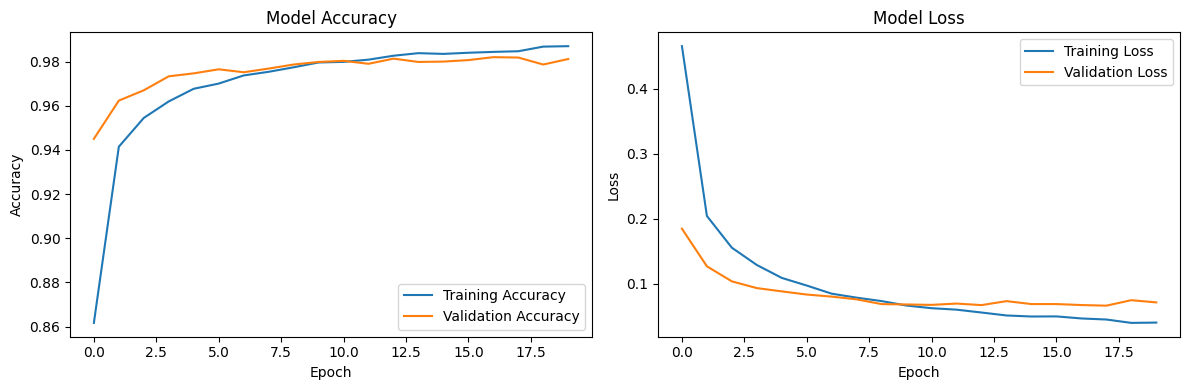

In [11]:
#@title Visualiaasi
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Grafik Akurasi (kiri):

Garis biru menunjukkan akurasi pelatihan, dan garis oranye menunjukkan akurasi validasi.
Secara umum, akurasi meningkat dengan bertambahnya epoch dan stabil setelah beberapa epoch.
Grafik Loss (kanan):

Garis biru menunjukkan loss pelatihan, dan garis oranye menunjukkan loss validasi.
Loss menurun dengan bertambahnya epoch, menunjukkan bahwa model menjadi lebih baik dalam memprediksi data, tetapi kemudian mulai stabil.


## Kesimpulannya
Kesimpulannya, model ini memiliki akurasi yang baik, dengan training dan validation loss yang konsisten menurun, menunjukkan bahwa tidak ada masalah overfitting yang signifikan.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


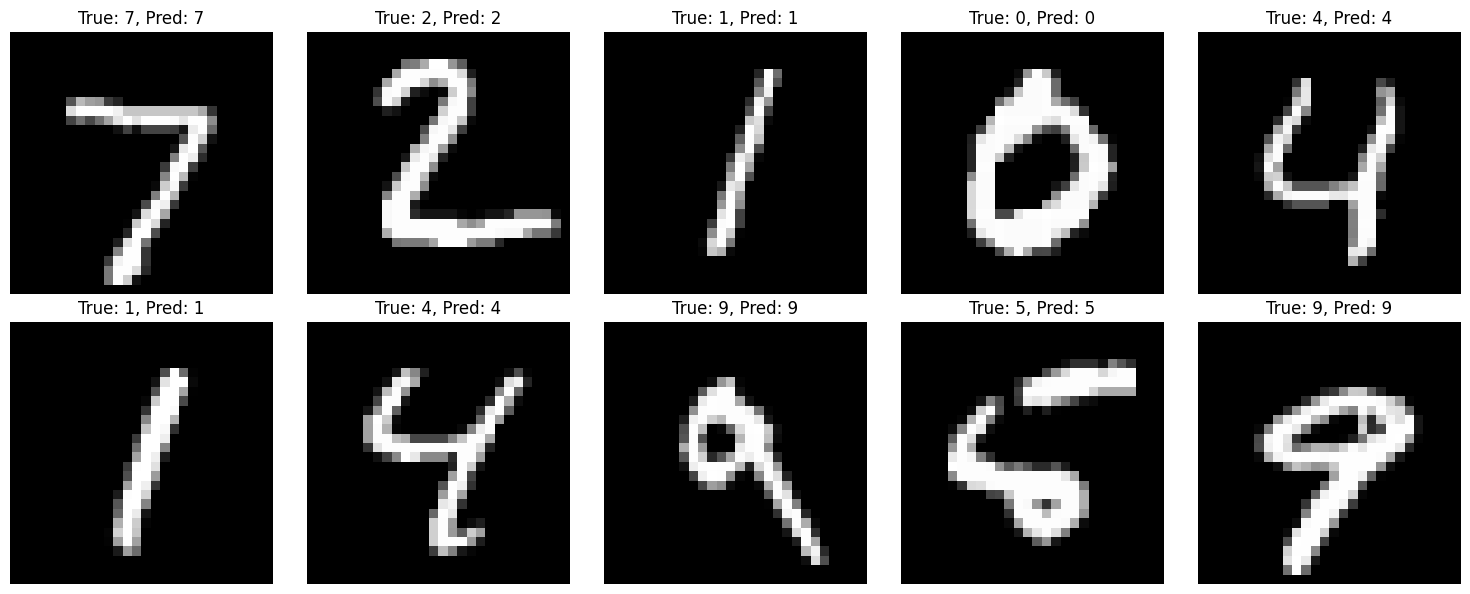

In [12]:
#@title Predict Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display some example predictions
num_examples = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


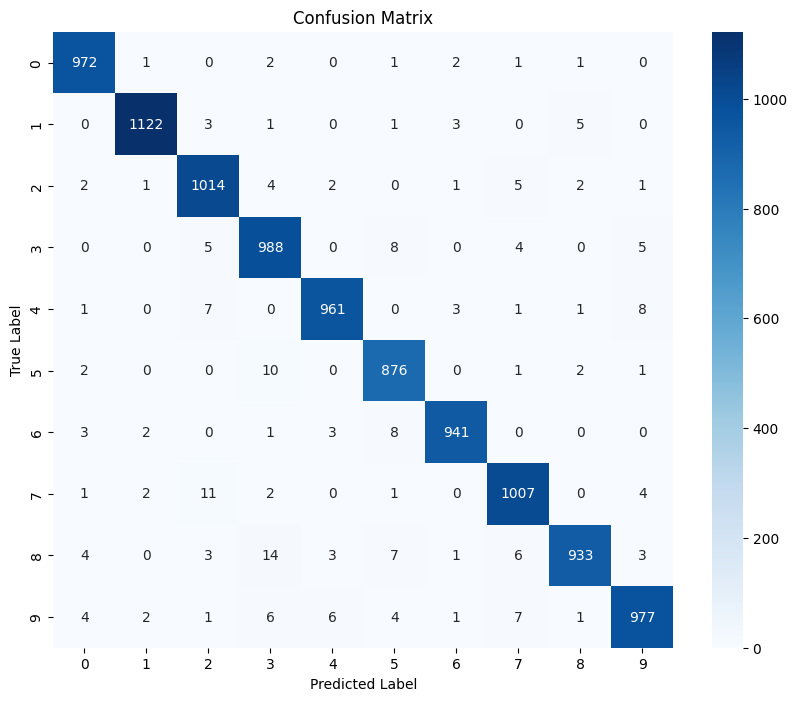

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



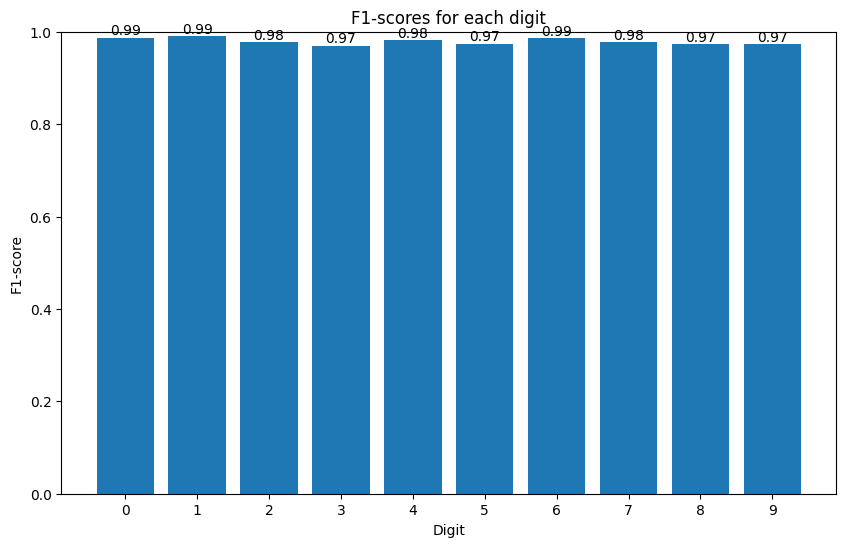

In [15]:
# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and display classification report (including F1-score)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(class_report)

# Calculate and plot F1-scores for each class
f1_scores = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)], output_dict=True)
f1_scores_dict = {k: v['f1-score'] for k, v in f1_scores.items() if k.isdigit()}

plt.figure(figsize=(10, 6))
plt.bar(f1_scores_dict.keys(), f1_scores_dict.values())
plt.title('F1-scores for each digit')
plt.xlabel('Digit')
plt.ylabel('F1-score')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores_dict.values()):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()